# Data Science Wednesday 02/27/2019

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Explore Data 
The dataset is originally from National Institute of Diabetes and Digestive and Kidney Diseases. The purpose of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. This datset is restricted to females at least 21 years old of Pima Indian heritage.

In [57]:
#Read in Data 
diab = pd.read_csv("/Users/meghanatatineni/Documents/DSI/DSW/Data_Science_Wednesday/diabetes.csv")
#Return First 5 columns 
diab.head(5)
diab.info()
#Change into Factor
diab['Outcome'] = diab['Outcome'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
#summary statistics 
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [59]:
#Return missing values 
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a167989e8>,
      dtype=object)

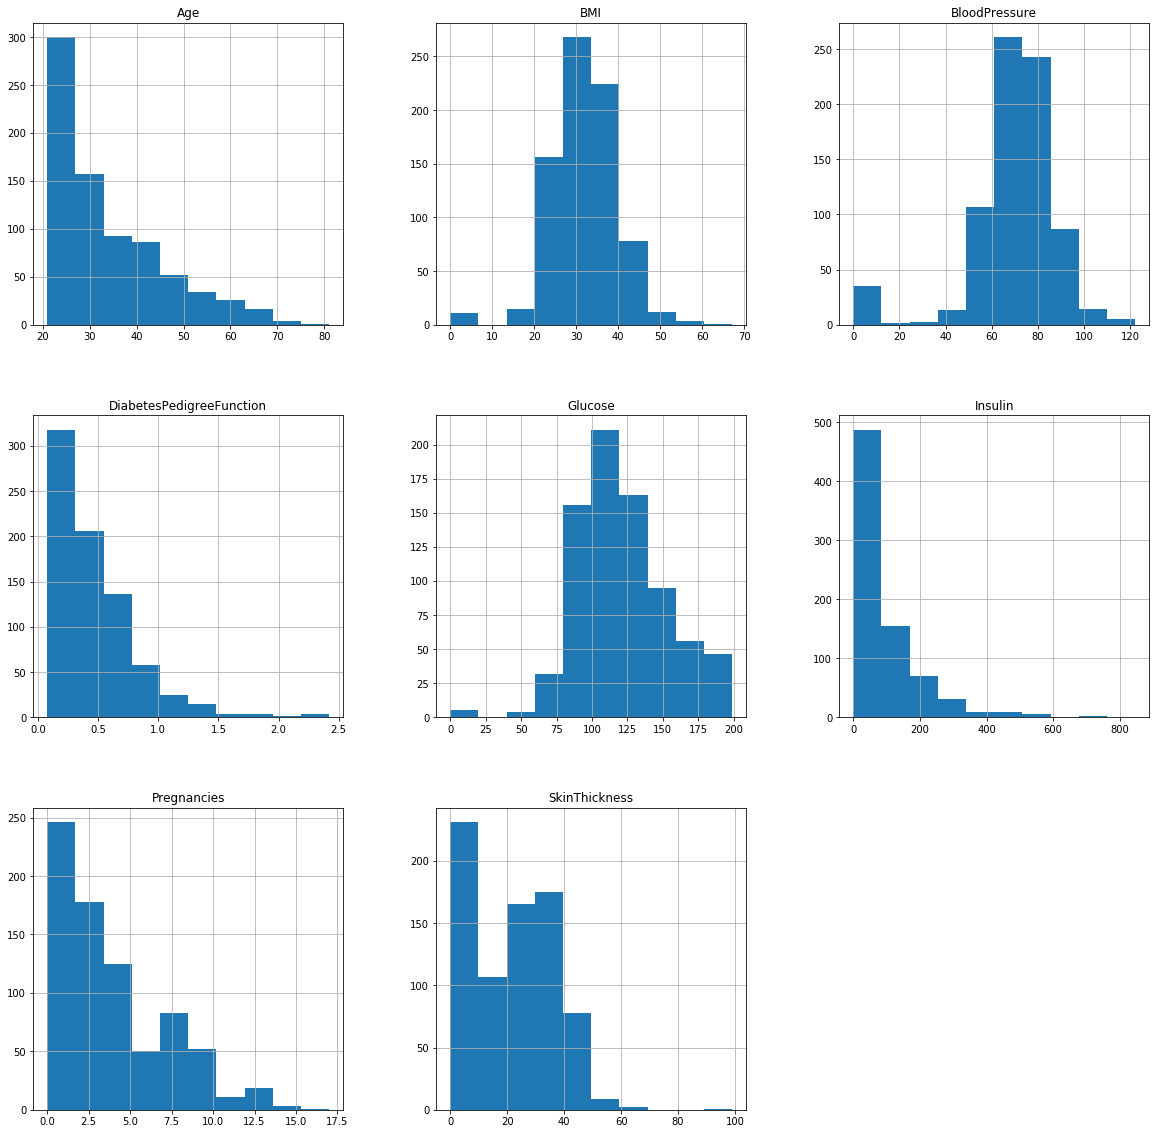

In [60]:
#before cleaning 
diab.hist(figsize = (20,20))

It does not make sense that some of these features are 0 so lets replace with NA 

In [61]:
#Remove missing columns 
diab[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diab[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diab.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [62]:
diab['Glucose']=diab['Glucose'].fillna(diab['Glucose'].mean())
diab['BMI']=diab['BMI'].fillna(diab['BMI'].mean())
print(diab.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19888f60>,
      dtype=object)

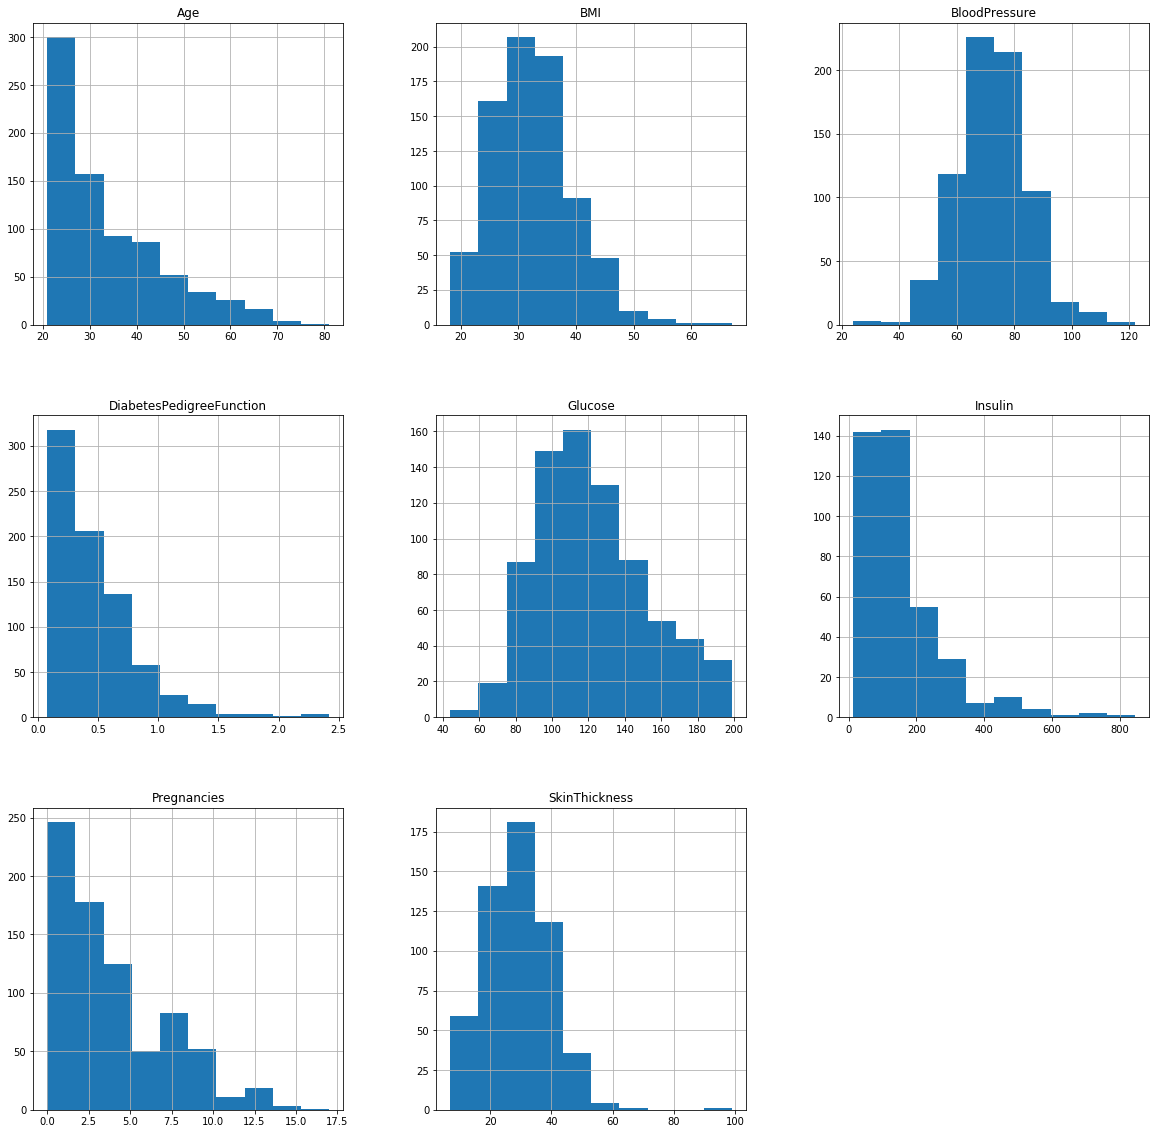

In [63]:
diab.hist(figsize = (20,20))

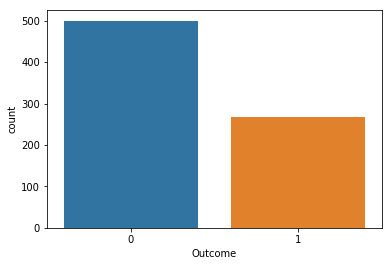

In [64]:
sns.countplot(x='Outcome',data=diab)

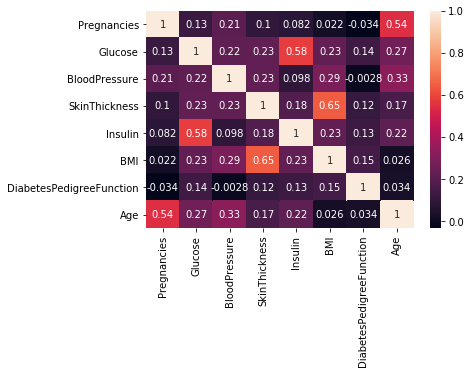

In [65]:
#Correlation Heat Map
corr = diab[diab.columns].corr()
sns.heatmap(corr, annot = True)

## Violin Plot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

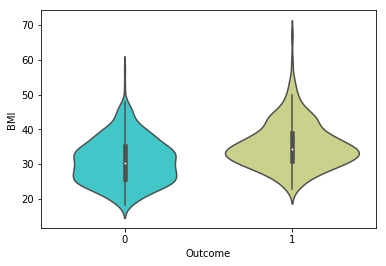

In [66]:
sns.violinplot(x="Outcome", y="BMI", data=diab,palette='rainbow')

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #Standardisation
import warnings
warnings.filterwarnings('ignore')

## Standarizing and Cross Validation
Before we start modeling, we need to split our data into a testing and training set.The purpose of this is to prevent overfitting. Here we are randomly splitting our data into 75% traning set and 25% testing set. We use the training set to train our model and the testing set to determine the accuracy of the model.
We are stratiying our sample so that we get an equal number of classes in our training and testing set. 

In [68]:
diab2=diab[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
features=diab2[diab2.columns[:4]]

features_standard=StandardScaler().fit_transform(features)
features_standard
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])

x['Outcome']=diab2['Outcome']
train,test=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])

train_X=train[train.columns[:4]]
test_X=test[test.columns[:4]]
train_Y=train['Outcome']
test_Y=test['Outcome']


## Logistic Regression
Logistic regression is a simple statistical model which predicts a binary response (ex.YES/NO). For this data, we are predicting whether a woman is diabetic or not.

In [69]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.7864583333333334


## K-nearest neighbors
For each test data point, we would be looking at the K nearest training data points and take the most frequently occurring classes and assign that class to the test data

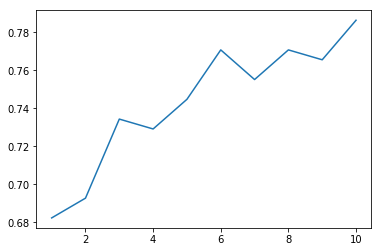

Accuracies for different values of n are: [0.68229167 0.69270833 0.734375   0.72916667 0.74479167 0.77083333
 0.75520833 0.77083333 0.765625   0.78645833]


In [70]:
k_par=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(k_par, a)
plt.show()
print('Accuracies for different values of n are:',a.values)